In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [5]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
image = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")

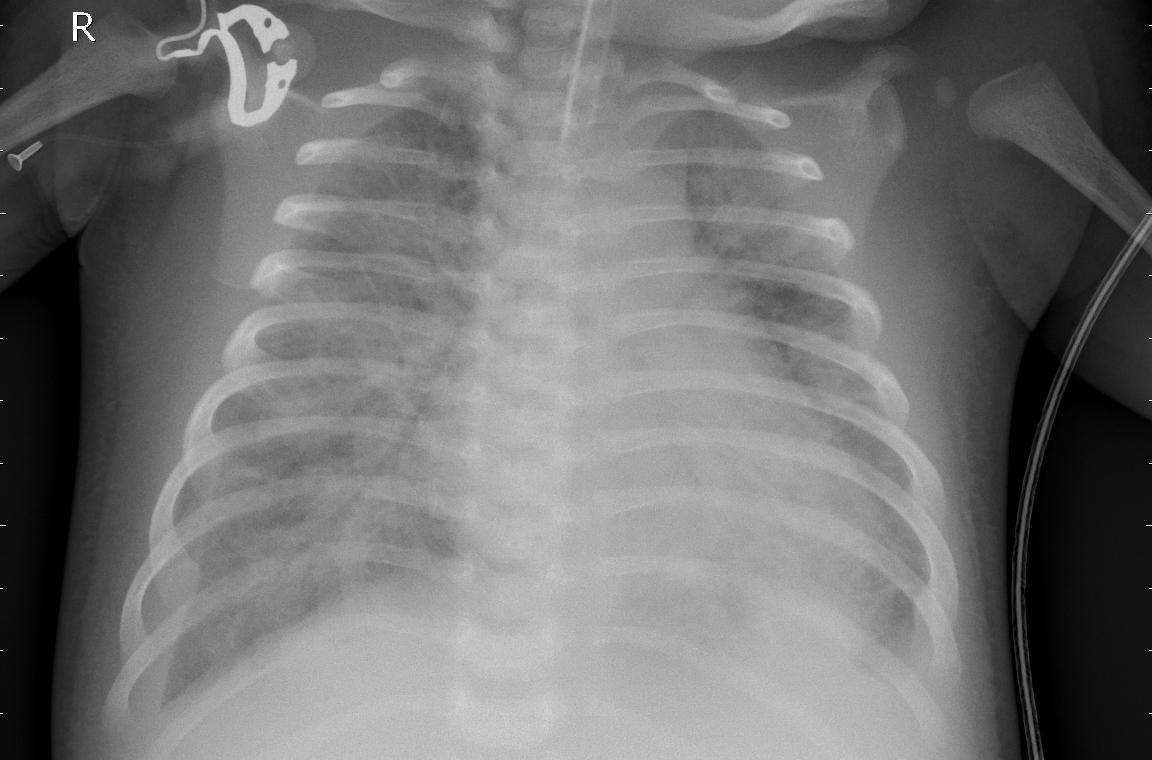

In [7]:
image

image

In [8]:
image_normal = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg")

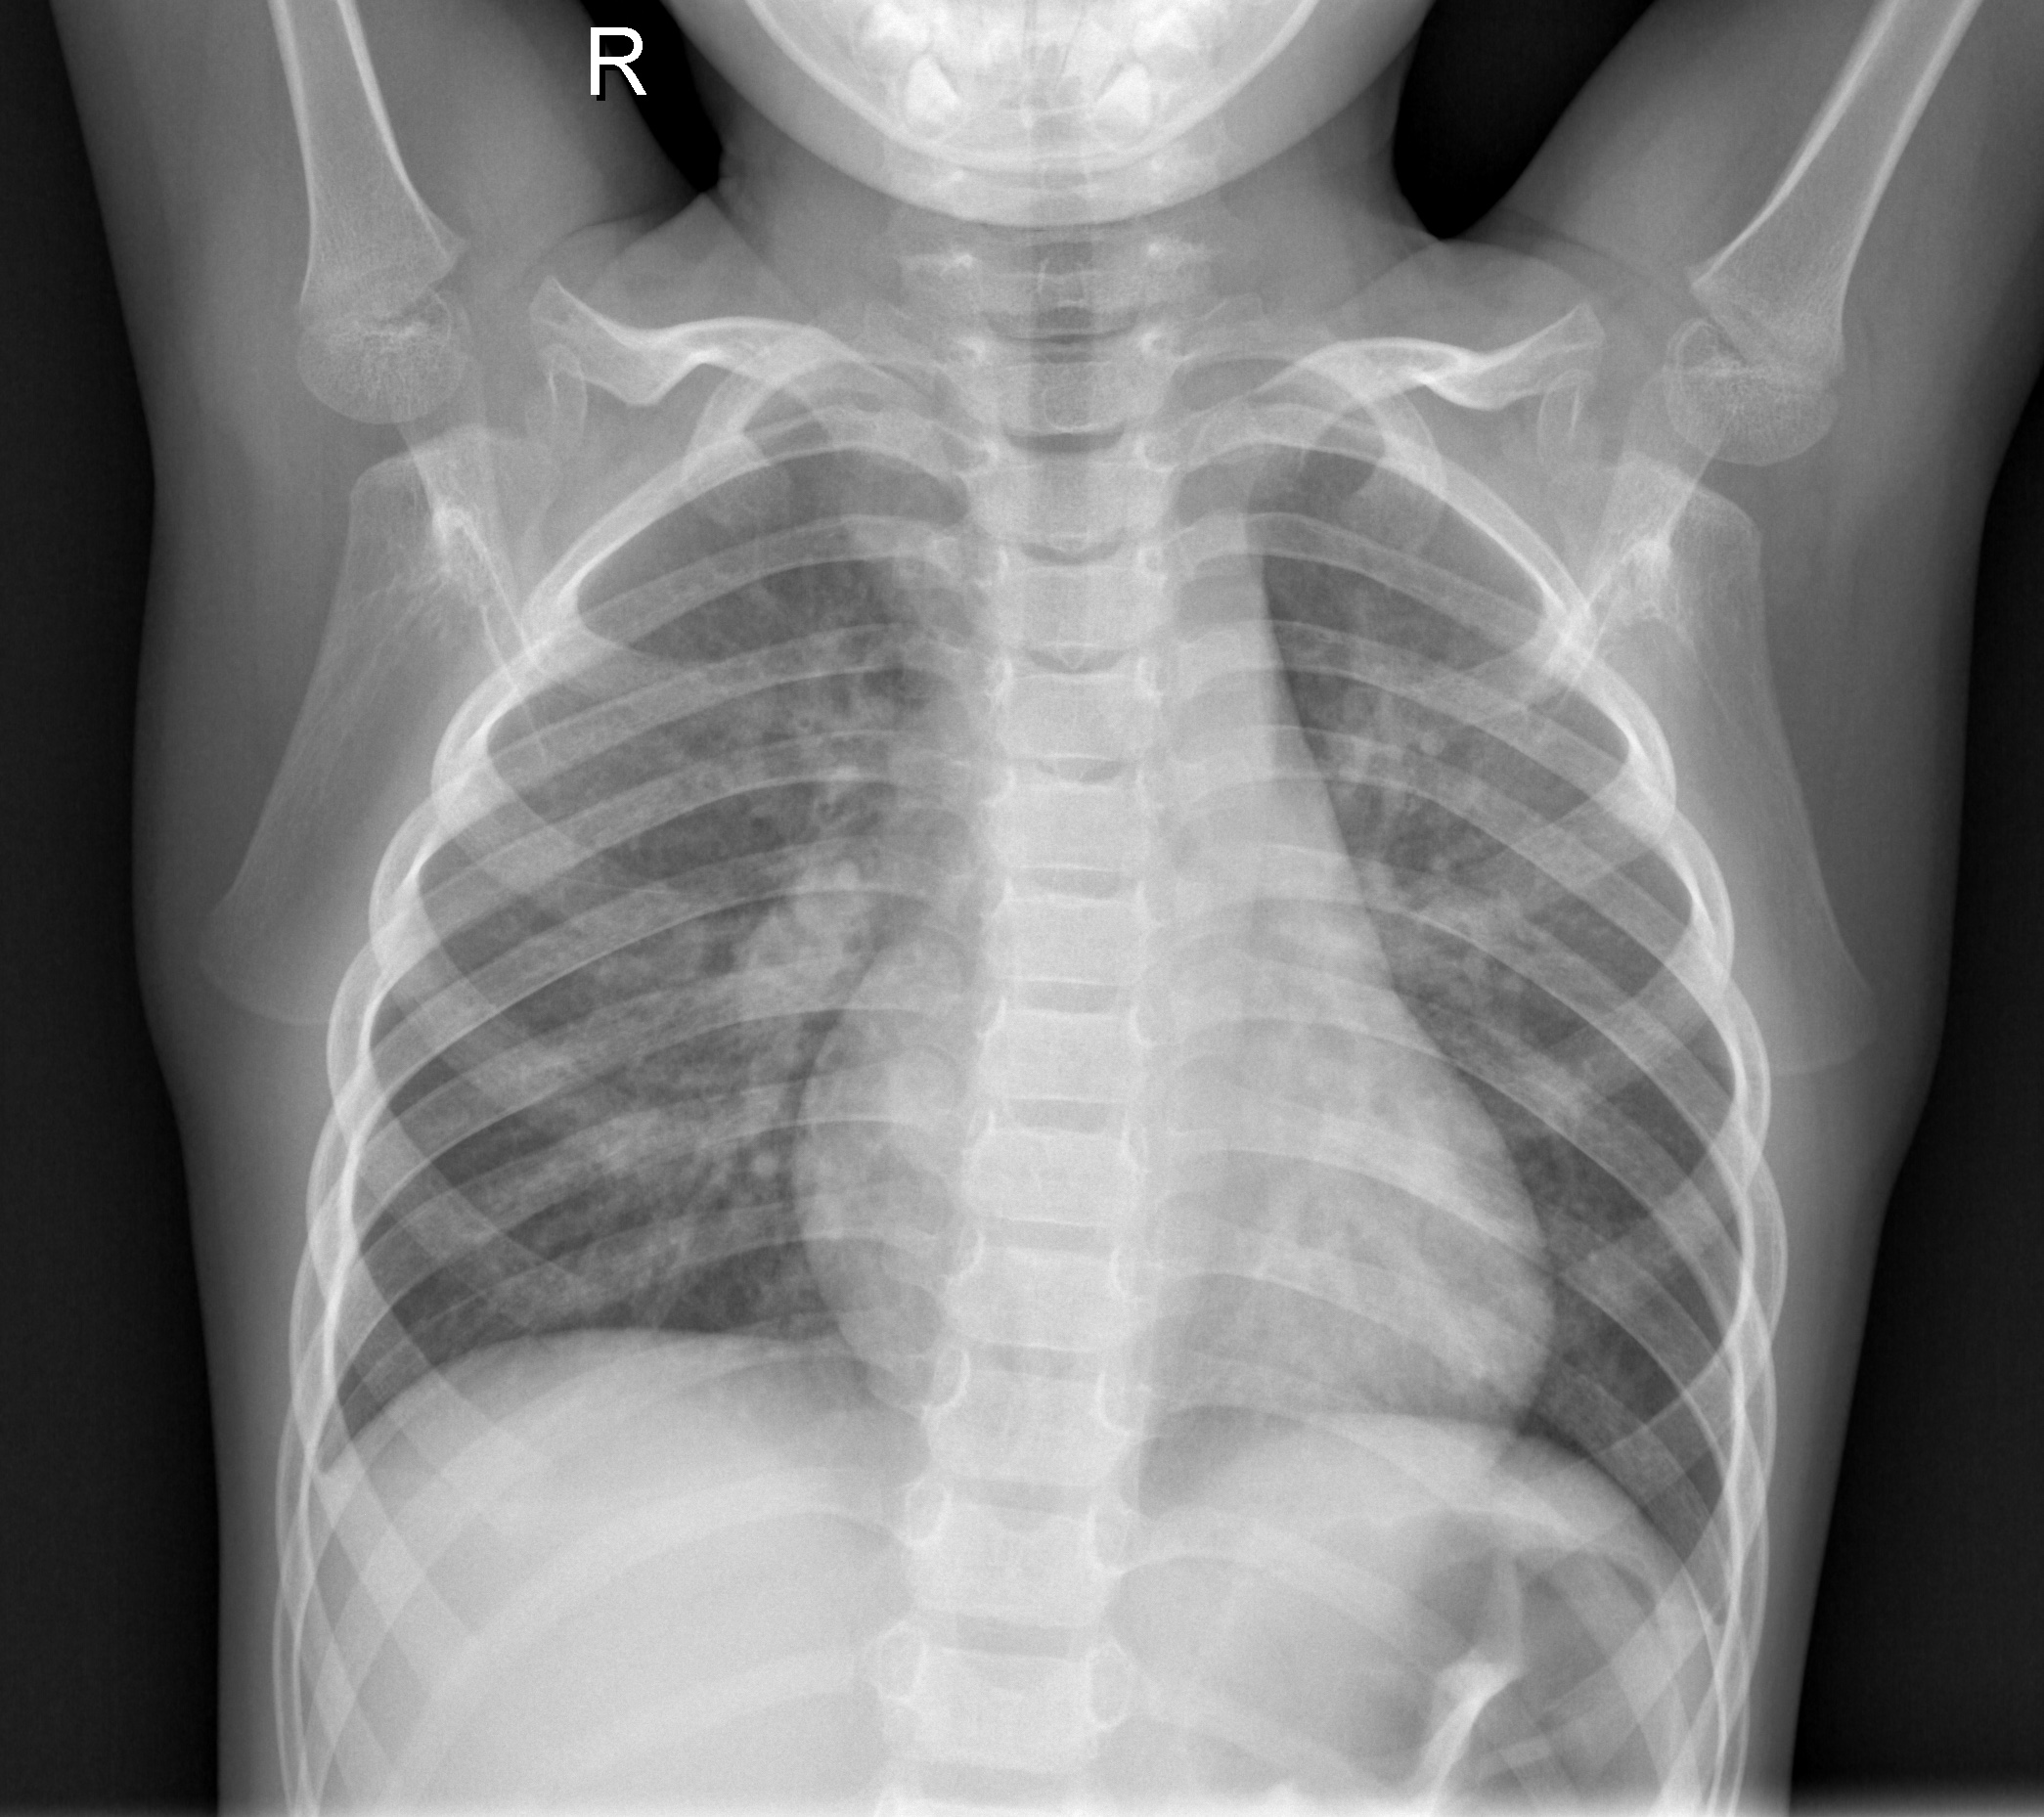

In [9]:
image_normal

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
training_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"

training_generator = ImageDataGenerator(rescale=1/255)


data_train = training_generator.flow_from_directory(training_dir,target_size=(120,120),batch_size=8,class_mode="binary")

Found 5216 images belonging to 2 classes.


In [26]:
valid_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

validation_generator = ImageDataGenerator(rescale=1/255)


data_valid = validation_generator.flow_from_directory(valid_dir,target_size=(120,120),batch_size=8,class_mode="binary")

Found 16 images belonging to 2 classes.


In [27]:
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

testing_generator = ImageDataGenerator(rescale=1/255)


data_test = testing_generator.flow_from_directory(test_dir,target_size=(120,120),batch_size=8,class_mode="binary")

Found 624 images belonging to 2 classes.


**CNN**

In [37]:


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3),activation= "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3),activation= "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3),activation= "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    #adding more layers to inc efficiency..also adding activation = relu in every layer.........and removing overfitting dropout
    tf.keras.layers.Conv2D(512, (3, 3),activation= "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         6,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,817 (1.51 MB)

 Trainable params: 394,817 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["acc"])

In [40]:
history = model.fit(data_train, epochs=2, validation_data=data_valid)


Epoch 1/2
652/652 ━━━━━━━━━━━━━━━━━━━━ 115s 171ms/step - acc: 0.7618 - loss: 0.5595 - val_acc: 0.6875 - val_loss: 0.5794
Epoch 2/2
652/652 ━━━━━━━━━━━━━━━━━━━━ 111s 168ms/step - acc: 0.9241 - loss: 0.1928 - val_acc: 0.8125 - val_loss: 0.4980


In [41]:
model.evaluate(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - acc: 0.7878 - loss: 0.6393


[0.6613301634788513, 0.7820512652397156]

In [42]:
predictions=model.predict(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step


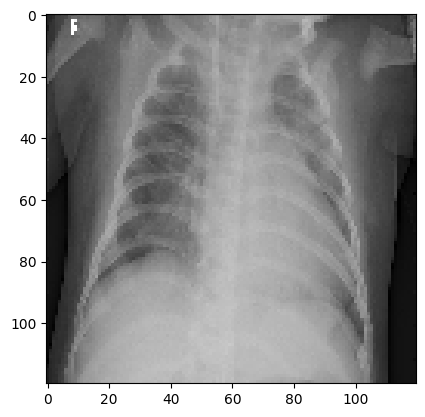

The probability of pneumonia is: [0.9924164]


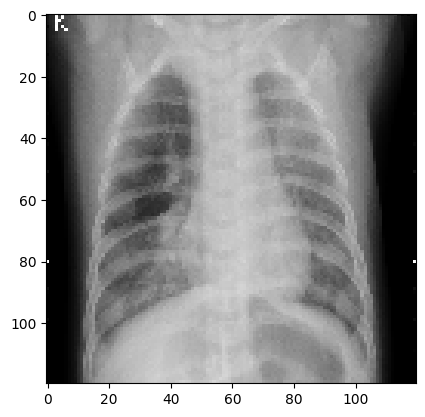

The probability of pneumonia is: [0.7207149]


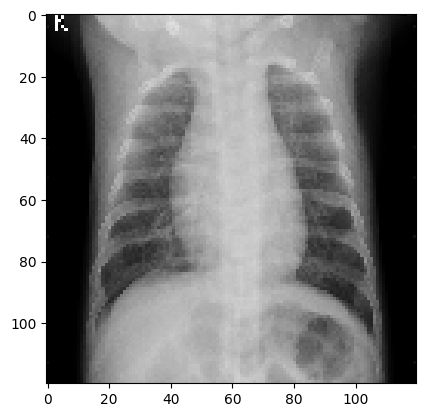

The probability of pneumonia is: [0.9985428]


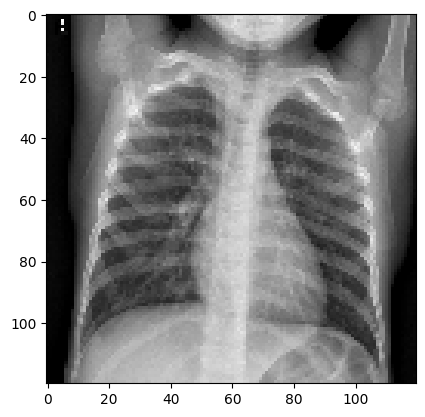

The probability of pneumonia is: [0.99636626]


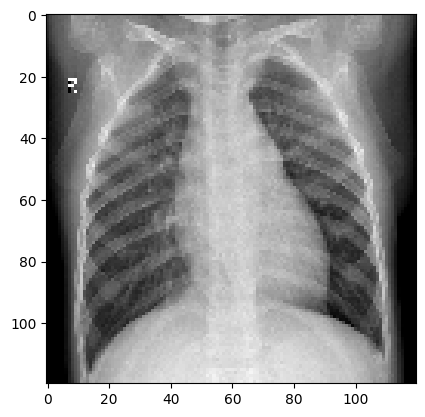

The probability of pneumonia is: [0.96917105]


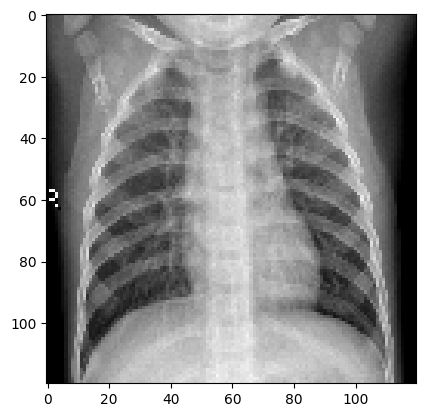

The probability of pneumonia is: [0.44292337]


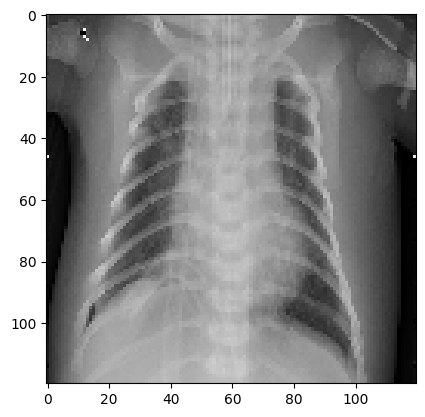

The probability of pneumonia is: [0.20793633]


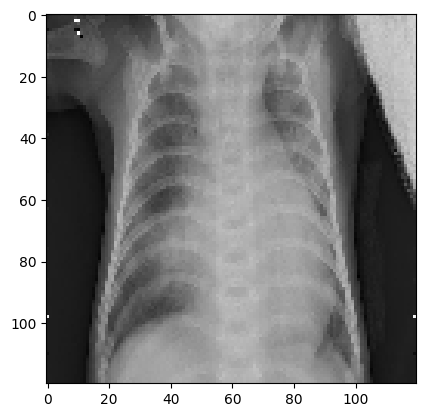

The probability of pneumonia is: [0.44619673]


IndexError: index 8 is out of bounds for axis 0 with size 8

In [47]:
x = next(data_test)
 
for i in range(0, 1):  
    image = x[i]  
    for j in range(0, 16):  
        plt.imshow(image[j])  
        plt.show()
        print("The probability of pneumonia is:", predictions[j]) 
